<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/3FOURIER/DetectorGeneroMusical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PARTE 1: Archivo con canciones de 2 Géneros distintos

In [78]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
from IPython.display import Audio
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from google.colab import files
from datetime import date, datetime
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import yt_dlp as youtube_dl
import subprocess
import joblib
import shutil

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-any.whl (6

*- Importación de Canciones (Archivo de Excel)*

In [79]:
#https://docs.google.com/spreadsheets/d/1TPDo73tTyKNElRo_txM-GDMf5X2Dr4_8/edit?usp=share_link&ouid=101867657099375944630&rtpof=true&sd=true
FILEID = "1TPDo73tTyKNElRo_txM-GDMf5X2Dr4_8"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir
file_ = 'canciones.xlsx' #leer archivo xlsx con link, artist, type
X  = pd.read_excel(file_)
X

--2023-10-23 00:28:37--  https://docs.google.com/uc?export=download&confirm=&id=1TPDo73tTyKNElRo_txM-GDMf5X2Dr4_8
Resolving docs.google.com (docs.google.com)... 108.177.126.113, 108.177.126.100, 108.177.126.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dkoa9305n5iuaep6u5qbfnus7529j33s/1698020850000/08572618799820046035/*/1TPDo73tTyKNElRo_txM-GDMf5X2Dr4_8?e=download&uuid=22a6bb88-8353-4779-b49e-b5e6eec88dd6 [following]
--2023-10-23 00:28:38--  https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dkoa9305n5iuaep6u5qbfnus7529j33s/1698020850000/08572618799820046035/*/1TPDo73tTyKNElRo_txM-GDMf5X2Dr4_8?e=download&uuid=22a6bb88-8353-4779-b49e-b5e6eec88dd6
Resolving doc-00-1s-docs.googleusercontent.com (doc-00-1s-docs.googleusercontent.com)... 108.177.126.1

,link,artist,genre,genrenum
0,https://www.youtube.com/watch?v=1m6en0SQNFs,GeorgeMichael,balada,1
1,https://www.youtube.com/watch?v=450p7goxZqg,JohnLegend,balada,1
2,https://www.youtube.com/watch?v=0yW7w8F2TVA,JamesArthur,balada,1
3,https://www.youtube.com/watch?v=3JWTaaS7LdU,WhitneyHouston,balada,1
4,https://www.youtube.com/watch?v=Ju8Hr50Ckwk,AliciaKeys,balada,1
5,https://www.youtube.com/watch?v=-2U0Ivkn2Ds,AGreatBigWorld,balada,1
6,https://www.youtube.com/watch?v=4iusJui-BxM,MariahCarey,balada,1
7,https://www.youtube.com/watch?v=hLQl3WQQoQ0,Adele,balada,1
8,https://www.youtube.com/watch?v=tH2w6Oxx0kQ,Kansas,balada,1
9,https://www.youtube.com/watch?v=YFood_bTOX4,MichaelBolton,balada,1


*- Carpeta de Archivos descargados*

In [80]:
#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [81]:
#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"artist: {X.loc[n,'artist']}\n")
    print(f"genre: {X.loc[n,'genre']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'artist']+"_"+str(n)+"_"+str(X.loc[n,'genrenum']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

Carpeta results ya existe
video 1 de 20
link: https://www.youtube.com/watch?v=1m6en0SQNFs

artist: GeorgeMichael

genre: balada

[youtube] Extracting URL: https://www.youtube.com/watch?v=1m6en0SQNFs
[youtube] 1m6en0SQNFs: Downloading webpage
[youtube] 1m6en0SQNFs: Downloading ios player API JSON
[youtube] 1m6en0SQNFs: Downloading android player API JSON
[youtube] 1m6en0SQNFs: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=1m6en0SQNFs
[youtube] 1m6en0SQNFs: Downloading webpage
[youtube] 1m6en0SQNFs: Downloading ios player API JSON
[youtube] 1m6en0SQNFs: Downloading android player API JSON
[youtube] 1m6en0SQNFs: Downloading m3u8 information
[info] 1m6en0SQNFs: Downloading 1 format(s): 251
[download] results/GeorgeMichael_0_1.mp3 has already been downloaded
[download] 100% of    4.86MiB
Download complete... results/GeorgeMichael_0_1.mp3
video 2 de 20
link: https://www.youtube.com/watch?v=450p7goxZqg

artist: JohnLegend

genre: balada

[youtube] Extr

In [82]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Adele_7_1.wav',
 'StrayKids_18_2.wav',
 'StrayKids_10_2.wav',
 'AliciaKeys_4_1.wav',
 'JamesArthur_2_1.wav',
 'Gidle_13_2.wav',
 'Zerobaseone_17_2.wav',
 'Kansas_8_1.wav',
 'MichaelBolton_9_1.wav',
 'BoysPlanet_11_2.wav',
 'NCT127_16_2.wav',
 'Stayc_14_2.wav',
 'WhitneyHouston_3_1.wav',
 'JohnLegend_1_1.wav',
 'GeorgeMichael_0_1.wav',
 'MariahCarey_6_1.wav',
 'AGreatBigWorld_5_1.wav',
 'Itzy_19_2.wav',
 'NCTu_12_2.wav',
 'StrayKids_15_2.wav']

Ingresamos la libreria SOUNDFILE, leemos los archivos, realizamos todas las especificaciones necesarias y recorremos la lista de canciones.

In [83]:
!pip install soundfile #instalar sondfile

In [84]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,60,70,80,90,100,110]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: Adele_7_1.wav; segundo 40:45; tipo música [1.]
1 lectura: Adele_7_1.wav; segundo 60:65; tipo música [1.]
2 lectura: Adele_7_1.wav; segundo 70:75; tipo música [1.]
3 lectura: Adele_7_1.wav; segundo 80:85; tipo música [1.]
4 lectura: Adele_7_1.wav; segundo 90:95; tipo música [1.]
5 lectura: Adele_7_1.wav; segundo 100:105; tipo música [1.]
6 lectura: Adele_7_1.wav; segundo 110:115; tipo música [1.]
7 lectura: StrayKids_18_2.wav; segundo 40:45; tipo música [2.]
8 lectura: StrayKids_18_2.wav; segundo 60:65; tipo música [2.]
9 lectura: StrayKids_18_2.wav; segundo 70:75; tipo música [2.]
10 lectura: StrayKids_18_2.wav; segundo 80:85; tipo música [2.]
11 lectura: StrayKids_18_2.wav; segundo 90:95; tipo música [2.]
12 lectura: StrayKids_18_2.wav; segundo 100:105; tipo música [2.]
13 lectura: StrayKids_18_2.wav; segundo 110:115; tipo música [2.]
14 lectura: StrayKids_10_2.wav; segundo 40:45; tipo música [2.]
15 lectura: StrayKids_10_2.wav; segundo 60:65; tipo música [2.]
16 lectura: S

(140, 240000, 2)

*- Lectura de muestras de audio*

In [85]:
muestra = int(input("Ingrese el numero de la muestra deseada [0,140]:"))
Audio(x_t[muestra].T,rate=fs)

Ingrese el numero de la muestra deseada [0,140]:90


*- Calculo de la Transformada Rapida de Fourier*

In [86]:
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(140, 120001)

*- Gráficas*

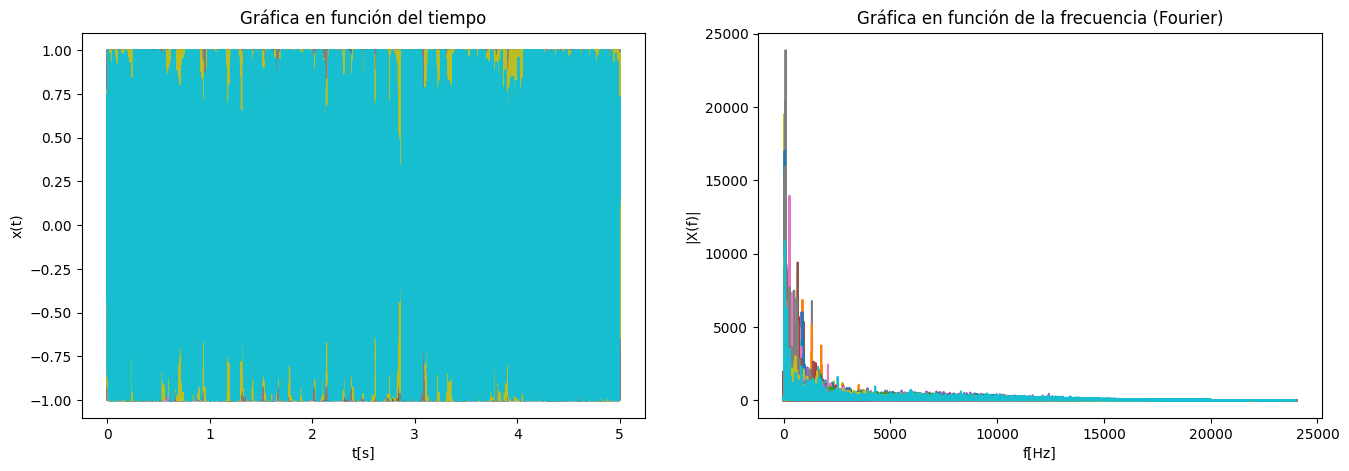

In [87]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo y se transpone el resultado
plt.title('Gráfica en función del tiempo')
plt.xlabel('t[s]')
plt.ylabel('x(t)')

plt.subplot(122)
plt.plot(vf,abs(Xw).T) #gráfica de la amplitud en función de la frecuencia
plt.title('Gráfica en función de la frecuencia (Fourier)')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')

plt.show()

*- Normalización* (Para evitar inconsistencias)

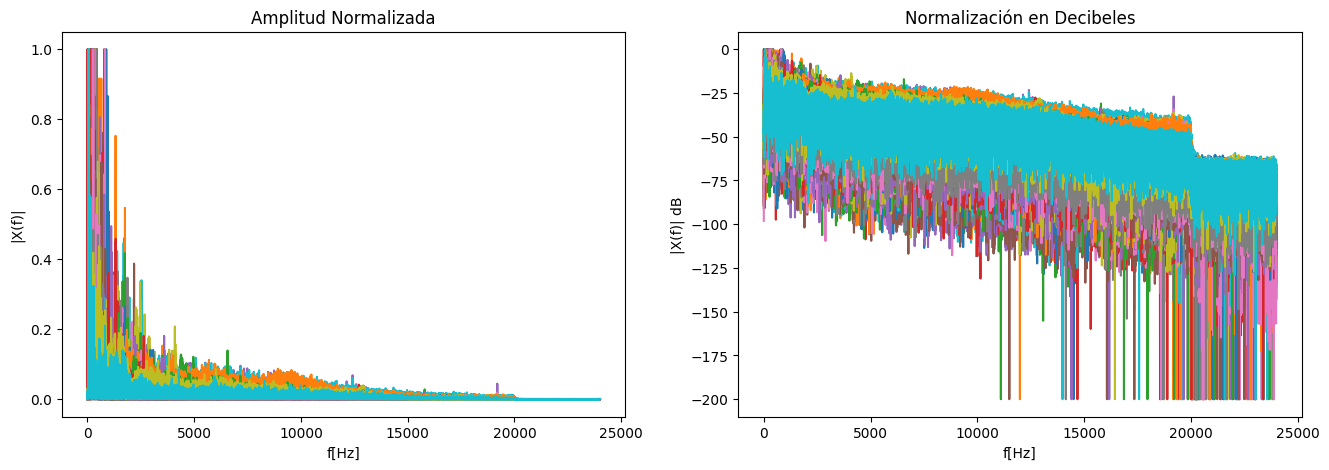

In [88]:
sca = MinMaxScaler() #por default, se normaliza entre 0 y 1. puede cambiarse la amplitud normalizada a una que queramos con feature_range(min,max)
Xw2 = sca.fit_transform(abs(Xw).T).T

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(vf,Xw2.T)
plt.title('Amplitud Normalizada')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')

#en dB
plt.subplot(122)
plt.plot(vf,(20*np.log10(Xw2+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.title('Normalización en Decibeles')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')

plt.show()

*- Analísis 2D*

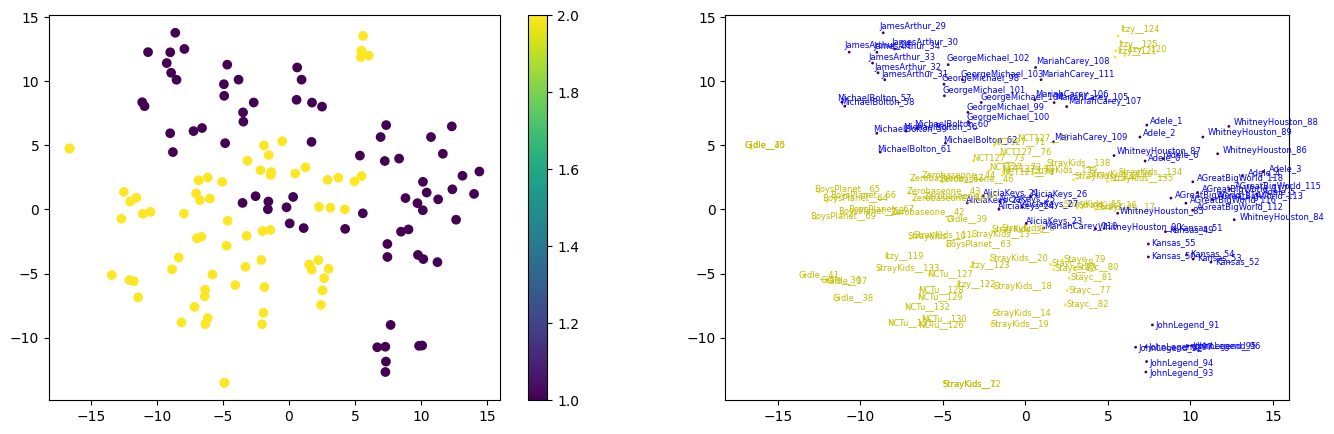

In [89]:
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw2[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

#Gráfica 2D
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()

plt.subplot(122)
color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.show()

*- Modelo y Descarga en formato zip*

In [93]:
#Modelo
os.mkdir('modelo')
ModeloCanciones = 'modelo/balada_vs_kpop'
model_ ={'Xw2':Xw2,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,ModeloCanciones+".pkl")


['modelo/balada_vs_kpop.pkl']

In [94]:
#Descarga
namefile = str('Modelo'+'Canciones')
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*- Llamar al archivo.*

In [95]:
my_model_loaded = joblib.load(ModeloCanciones+".pkl")
my_model_loaded.keys()

dict_keys(['Xw2', 'fmax', 'label', 'name_c', 'vf', 'fs'])

PARTE 2: Entrada con nueva canción para detectar su género (POP o SALSA)

*- Importación de la canción*

In [97]:
CAC = input("Ingrese el link de la cancion a comparar: ")
download_ytvid_as_mp3(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

Ingrese el link de la cancion a comparar: https://www.youtube.com/watch?v=TQTlCHxyuu8
[youtube] Extracting URL: https://www.youtube.com/watch?v=TQTlCHxyuu8
[youtube] TQTlCHxyuu8: Downloading webpage
[youtube] TQTlCHxyuu8: Downloading ios player API JSON
[youtube] TQTlCHxyuu8: Downloading android player API JSON
[youtube] TQTlCHxyuu8: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=TQTlCHxyuu8
[youtube] TQTlCHxyuu8: Downloading webpage
[youtube] TQTlCHxyuu8: Downloading ios player API JSON
[youtube] TQTlCHxyuu8: Downloading android player API JSON
[youtube] TQTlCHxyuu8: Downloading m3u8 information
[info] TQTlCHxyuu8: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    2.93MiB
Download complete... Cancion.mp3


0

*- Selección y generación del segmento a comparar*

In [101]:
plc = np.array([90])  # El punto de lectura de la canción ingresada será en 90 segundos
x_t_c = np.zeros((1, int(ts * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  x_t_c[i] = x[int(fs*ti):int(fs*(ti+ts)),:] #aquí se crea la muestra de 5s de la cancion ingresada

*- Aplicación de Fourier y distancia euclidiana*

In [102]:
Xw_2 = np.fft.rfft(x_t_c,axis=1).mean(axis=-1) #Transformada de Fourier
Xw_3 = sca.fit_transform(abs(Xw_2).T).T #Normalizacion

In [103]:
def euclidiana(Xw_3, Xw2):
    distances = np.zeros(Xw2.shape[0])  # Inicializar un arreglo para almacenar las distancias
    for i in range(Xw2.shape[0]):
        DE = np.sqrt(np.sum((Xw_3 - Xw2[i])**2))
        distances[i] = DE
    return distances

MinimaD = euclidiana(Xw_3, Xw2) #lista de las distancias de la entrada con toda la base de datos

Alfa = MinimaD[0]
for i in range(len(MinimaD)):   #Buscamos la distancia mas pequeña entre la señal ingresada y la base de datos
  if Alfa>MinimaD[i]:
    Alfa = MinimaD[i]
    a=i

print(MinimaD)
print(label[a])
print(MinimaD[a])

[ 6.91662457  9.63780442  6.15801217 10.14797568  8.14718179 10.20339631
  9.12404396  8.35201294  3.22632338  3.68384083  5.40043615  4.57487331
  7.7917158   7.13107759 10.95089083  4.41877895  3.47906177  3.17972745
  5.74346684 14.32421849  4.22172951  4.25658241  5.69332591  5.86903581
  4.26640129  4.25531531  2.91137186  3.6059252  10.87186264  9.41066871
  6.32106327  6.62678289  5.43805018  6.43199203  5.94507995  7.53855447
  5.87465821  7.21093586  7.80730223  6.37592955  8.43186227  8.02585335
  7.92168075  5.17168702  4.64795024  5.09854481  5.78655359  6.01366373
  5.32703441  6.01096101  6.08187803  5.23416007  6.94318295  6.03526878
  4.80666934  4.2666212   5.26196352  8.07397564  8.27821707  8.80009338
  5.13817911  7.41271015  5.01511453  5.73372858  5.94331163  6.37846421
  5.67080214  3.69657014  5.1711376   7.57122016  4.17945072  5.68830692
  4.89559254  6.76933975  3.87607654  7.14803771  4.75136636  6.02782995
  4.61941993  4.57444792  4.94226546  4.99751333 11

*- Resultado de la comparación (A qué género pertenece la canción)*

In [104]:
print("La canción ingresada pertenece al género:", label[a])
if label[a]== 1:
   print("Es decir, es Balada")
else:
   print("Es decir, es Kpop")

La canción ingresada pertenece al género: [1.]
Es decir, es Balada
